# Variables de tiempo tiempo/fecha en python

**Estadística Aplicada**

**Cinthya Yesenia López Díaz 1658003**

**Sesión 14 - 30 de marzo 2023**

## Fechas en datetime

In [6]:
from datetime import datetime

In [8]:
# la fecha de hoy
mi_year = 2023
mi_mes = 3
mi_dia = 30
mi_hora = 14
mi_minuto = 27
mi_segundo = 30

In [9]:
# las fechas en python son año-mes-día
mi_fecha = datetime(mi_year,mi_mes,mi_dia)

In [10]:
mi_fecha

datetime.datetime(2023, 3, 30, 0, 0)

In [11]:
mi_fecha_hora = datetime(mi_year,mi_mes,mi_dia,mi_hora,mi_minuto,mi_segundo)

In [12]:
mi_fecha_hora

datetime.datetime(2023, 3, 30, 14, 27, 30)

In [13]:
#acceder al año de mi_fecha
mi_fecha.year

2023

In [14]:
#acceder al mes de mi_fecha
mi_fecha.month

3

In [15]:
#acceder al minuto de mi_fecha_hora
mi_fecha_hora.minute

27

# Fechas en numpy

In [16]:
import numpy as np

In [17]:
#por default reconoce días en datetime64
np.array(['1998-09-13','1997-09-01','2022-03-29'], dtype = 'datetime64')

array(['1998-09-13', '1997-09-01', '2022-03-29'], dtype='datetime64[D]')

In [18]:
#podemos especificar que reconzca horas
np.array(['1998-09-13','1997-09-01','2022-03-29'], dtype = 'datetime64[h]')

array(['1998-09-13T00', '1997-09-01T00', '2022-03-29T00'],
      dtype='datetime64[h]')

In [19]:
#especificar que reconzca el año
np.array(['1998-09-13','1997-09-01','2022-03-29'], dtype = 'datetime64[Y]')

array(['1998', '1997', '2022'], dtype='datetime64[Y]')

In [20]:
#vamos a pedir a numpy
np.arange('2023-01-01','2023-06-30',30,dtype = 'datetime64[D]')

array(['2023-01-01', '2023-01-31', '2023-03-02', '2023-04-01',
       '2023-05-01', '2023-05-31'], dtype='datetime64[D]')

In [21]:
np.arange('1998-09-13','2023-03-30',1,dtype = 'datetime64[Y]')

array(['1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'], dtype='datetime64[Y]')

# Fechas en pandas

In [1]:
import pandas as pd

In [2]:
semana8= pd.date_range('7/8/18',periods=7,freq='D')

In [3]:
semana8

DatetimeIndex(['2018-07-08', '2018-07-09', '2018-07-10', '2018-07-11',
               '2018-07-12', '2018-07-13', '2018-07-14'],
              dtype='datetime64[ns]', freq='D')

In [4]:
#de que forma le podemos pasar fechas a pandas
pd.to_datetime(['Apr 12, 2023','3/30/2023','01-Jan-2020'])

DatetimeIndex(['2023-04-12', '2023-03-30', '2020-01-01'], dtype='datetime64[ns]', freq=None)

In [22]:
algunas_fechas= np.array(['2023-01-12','2022-04-10'],dtype='datetime64[D]')
algunas_fechas

array(['2023-01-12', '2022-04-10'], dtype='datetime64[D]')

In [23]:
# Las podemos usar en pandas
algunas_fechas = pd.to_datetime(algunas_fechas)

In [26]:
# importar la libreria yahoo finance
import yfinance as yf 

In [27]:
tipo_cambio= yf.download('MXN=X',
                         start='2015-01-01',
                         end='2022-12-31')

[*********************100%***********************]  1 of 1 completed


In [28]:
tipo_cambio= tipo_cambio[['Adj Close']]

In [29]:
tipo_cambio

,Adj Close
Date,
2015-01-01,14.752790
2015-01-02,14.820430
2015-01-05,14.939420
2015-01-06,14.894670
2015-01-07,14.710200
...,...
2022-12-26,19.337391
2022-12-27,19.363070
2022-12-28,19.462099


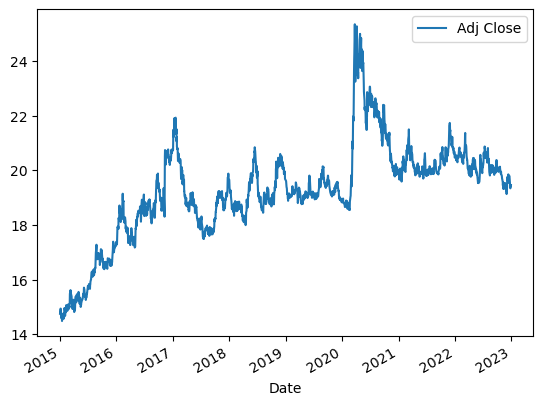

In [30]:
tipo_cambio.plot();

In [31]:
tipo_cambio.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
               '2022-12-23', '2022-12-26', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=2086, freq=None)

In [32]:
# al tipo de cambio diario le vamos a cambiar la frecuencia
# tipo de cambio anual, promedio 
tipo_cambio_anual = tipo_cambio.resample(rule='AS').mean()
tipo_cambio_anual

,Adj Close
Date,
2015-01-01,15.876770
2016-01-01,18.682247
2017-01-01,18.909394
2018-01-01,19.220598
2019-01-01,19.246592
2020-01-01,21.482632
2021-01-01,20.277665
2022-01-01,20.106256


In [33]:
## tipo de cambio mensual
tipo_cambio_mensual = tipo_cambio.resample(rule='MS').mean()
tipo_cambio_mensual

,Adj Close
Date,
2015-01-01,14.694401
2015-02-01,14.911954
2015-03-01,15.234560
2015-04-01,15.210350
2015-05-01,15.267061
...,...
2022-08-01,20.139255
2022-09-01,20.055597
2022-10-01,19.985488


In [34]:
# dias habiles = bussiness day 'B'
tipo_cambio = tipo_cambio.asfreq('B')

In [35]:
tipo_cambio.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
               '2022-12-23', '2022-12-26', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=2087, freq='B')

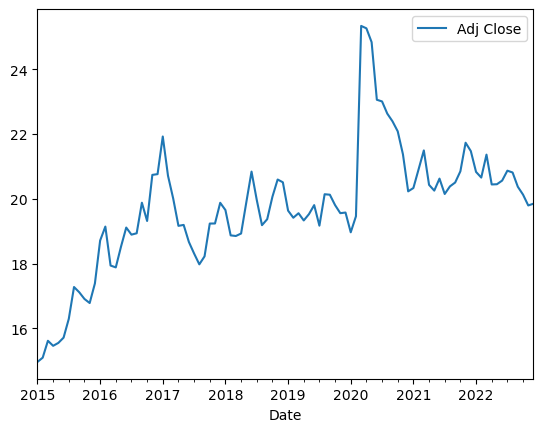

In [36]:
# valor maximo del tipo de cambio de cada mes
tipo_cambio.resample(rule='MS').max().plot();

In [37]:
## desplazamiento(shift)
tipo_cambio.head()

,Adj Close
Date,
2015-01-01,14.75279
2015-01-02,14.82043
2015-01-05,14.93942
2015-01-06,14.89467
2015-01-07,14.71020


In [38]:
tipo_cambio.shift(2).head()

,Adj Close
Date,
2015-01-01,NaN
2015-01-02,NaN
2015-01-05,14.75279
2015-01-06,14.82043
2015-01-07,14.93942


In [39]:
tipo_cambio.shift(-1).head()

,Adj Close
Date,
2015-01-01,14.82043
2015-01-02,14.93942
2015-01-05,14.89467
2015-01-06,14.71020
2015-01-07,14.66170
